In [10]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [11]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [12]:
!cd yolov5 & pip install -r requirements.txt

In [13]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [14]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\HRITH/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-6 Python-3.11.7 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [15]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [23]:
img = 'https://www.progressive.com/lifelanes/wp-content/uploads/2023/09/TrafFicJam_Banner.jpg'

In [24]:
results = model(img)
results.print()

image 1/1: 1000x2000 1 person, 18 cars, 2 trucks
Speed: 4345.6ms pre-process, 216.0ms inference, 16.0ms NMS per image at shape (1, 3, 320, 640)


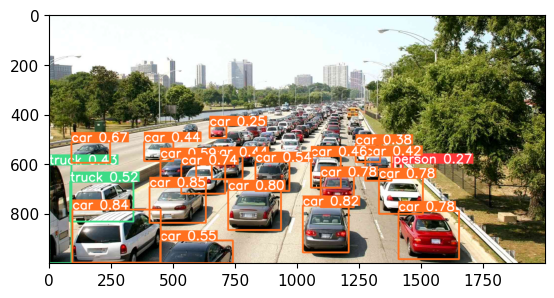

In [25]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [26]:
results.render()

[array([[[248, 254, 252],
         [248, 254, 252],
         [248, 254, 252],
         ...,
         [163, 176, 132],
         [ 97, 110,  64],
         [ 28,  41,   0]],
 
        [[248, 254, 252],
         [248, 254, 252],
         [248, 254, 252],
         ...,
         [116, 129,  85],
         [ 83,  96,  50],
         [ 46,  59,  13]],
 
        [[248, 254, 252],
         [248, 254, 252],
         [248, 254, 252],
         ...,
         [ 70,  83,  39],
         [ 67,  80,  34],
         [ 61,  74,  28]],
 
        ...,
 
        [[ 61, 219, 134],
         [ 61, 219, 134],
         [ 61, 219, 134],
         ...,
         [160, 143,  73],
         [166, 149,  79],
         [170, 153,  83]],
 
        [[ 61, 219, 134],
         [ 61, 219, 134],
         [ 61, 219, 134],
         ...,
         [168, 151,  81],
         [176, 159,  89],
         [182, 165,  95]],
 
        [[ 61, 219, 134],
         [ 61, 219, 134],
         [ 61, 219, 134],
         ...,
         [178, 161,  91],
  

In [27]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [28]:
import uuid   # Unique identifier
import os
import time

In [8]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [9]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.feb105fb-0b70-11ef-acda-4c445b35666f.jpg


In [17]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.1e08cf16-0b26-11ef-8697-4c445b35666f.jpg
data\images\awake.1e08cf17-0b26-11ef-88b2-4c445b35666f.jpg
data\images\awake.1e08cf18-0b26-11ef-8b1a-4c445b35666f.jpg
data\images\awake.1e08cf19-0b26-11ef-8b87-4c445b35666f.jpg
data\images\awake.1e08cf1a-0b26-11ef-99c7-4c445b35666f.jpg
data\images\awake.1e08cf1b-0b26-11ef-b553-4c445b35666f.jpg
data\images\awake.1e08cf1c-0b26-11ef-b53d-4c445b35666f.jpg
data\images\awake.1e08cf1d-0b26-11ef-8aa5-4c445b35666f.jpg
data\images\awake.1e0918ef-0b26-11ef-9d38-4c445b35666f.jpg
data\images\awake.1e0918f0-0b26-11ef-9cd7-4c445b35666f.jpg
data\images\awake.1e0918f1-0b26-11ef-b127-4c445b35666f.jpg
data\images\awake.1e0918f2-0b26-11ef-aa5c-4c445b35666f.jpg
data\images\awake.1e0918f3-0b26-11ef-9fa2-4c445b35666f.jpg
data\images\awake.1e0918f4-0b26-11ef-890c-4c445b35666f.jpg
data\images\awake.1e0918f5-0b26-11ef-9092-4c445b35666f.jpg
data\images\awake.1e0918f6-0b26-11ef-b727-4c445b35666f.jpg
data\images\awake.1e0918f7-0b26-11ef-b72f-4c445b35666f.j

In [80]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [29]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [30]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB 220.2 kB/s eta 0:00:18
    --------------------------------------- 0.1/3.8 MB 328.2 kB/s eta 0:00:12
   - -------------------------------------- 0.1/3.8 MB 610.6 kB/s eta 0:00:07
   -- ------------------------------------- 0.3/3.8 MB 983.0 kB/s eta 0:00:04
   ---- ----------------------------------- 0.4/3.8 MB 1.3 MB/s eta 0:00:03
   ------- -------------------------------- 0.7/3.8 MB 2.0 MB/s eta 0:00:02
   ----------- ---------------------------- 1.1/3.8 MB 2.8 MB/s eta 0:00:01
   --------------- ------------------------ 1.5/3.8 MB 3.3 MB/s eta 0:00:01
   --------------------- ------------------ 2.0/3.8 MB 4.3 MB/s eta 0:00:01
   ------------------------ ----

  You can safely remove it manually.


In [40]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 300 --data dataset.yaml --weights yolov5s.pt --workers 2

^C


In [33]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\HRITH/.cache\torch\hub\master.zip


requirements: Ultralytics requirements ['requests>=2.32.0', 'ultralytics>=8.2.34'] not found, attempting AutoUpdate...
     -------------------------------------- 41.2/41.2 kB 165.8 kB/s eta 0:00:00
   ---------------------------------------- 64.9/64.9 kB 497.2 kB/s eta 0:00:00
   -------------------------------------- 782.8/782.8 kB 915.3 kB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.9
    Uninstalling ultralytics-8.2.9:
      Successfully uninstalled ultralytics-8.2.9

requirements: AutoUpdate success  35.8s, installed 2 packages: ['requests>=2.32.0', 'ultralytics>=8.2.34']
requirements:  Restart runtime or rerun command for updates to take effect



YOLOv5  2024-6-19 Python-3.11.7 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [34]:
img = os.path.join('data', 'images', 'drowsy.e79b28eb-0b39-11ef-8aaa-4c445b35666f.jpg')

In [35]:
results = model(img)

In [36]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 24.2ms pre-process, 272.4ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


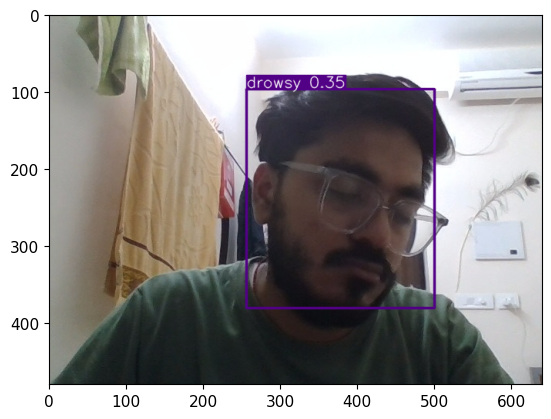

In [37]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [115]:
!pip install pygame

   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB 682.7 kB/s eta 0:00:16
    --------------------------------------- 0.2/10.8 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.8 MB 4.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/10.8 MB 6.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.8 MB 6.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.8 MB 7.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/10.8 MB 8.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/10.8 MB 7.1 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/10.8 MB 7.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.8 MB 7.6 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/10.8 MB 8.5 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/10.8 MB 8.6 MB/s eta 0:00:01
   -

In [ ]:
from playsound import playsound
import pygame
import cv2
import numpy as np

# Initialize pygame
pygame.init()

# Load sound file
drowsy_sound = pygame.mixer.Sound('Alert.wav')

# Set drowsiness threshold
drowsy_threshold = 0.2

# Flag to keep track of whether drowsiness was detected in the previous frame
drowsiness_detected = False

# Open camera
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)

    #print("Confidences:", [detection.confidence for detection in results.detections])

    # print("Names:", results.names)
    # print("Confidences:", results.confidences)

    # Check if 'drowsy' class is detected
    if len(results.names) > 1 and results.names[1] == 'drowsy':
        confidence = results.confidences[1]  # Confidenqce score for 'drowsy' class
        
        # Check if confidence is above threshold
        if confidence > drowsy_threshold:
            # Play the sound only if drowsiness is detected above the threshold
            if not drowsiness_detected:
                print("Drowsiness detected. Playing sound...")
                drowsy_sound.play()  # Play the sound
                drowsiness_detected = True
        else:
            # Reset the flag if drowsiness is detected below the threshold
            drowsiness_detected = False
    else:
        print()
            
    # Display the results
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # Check for quit key
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()
